In [1]:
import numpy as np

# Grid spacing and domain parameters
dx = 1936  # Grid spacing in meters (adjust as needed)
domain_size_x = 40  # Example size in the x-direction (can be from your namelist)
domain_size_y = 40  # Example size in the y-direction (can be from your namelist)

# Example turbine layout
turbine_model = "NREL-15MW-242"  # Example turbine model

# Create a grid of turbines (you can adjust number of turbines per grid cell)
n_turbines_x = domain_size_x  # Grid points in x-direction
n_turbines_y = domain_size_y  # Grid points in y-direction

# Generate turbine coordinates
x_coords = np.linspace(0, domain_size_x * dx, n_turbines_x)  # Grid points in x-direction
y_coords = np.linspace(0, domain_size_y * dx, n_turbines_y)  # Grid points in y-direction

# Loop over the grid to generate turbine coordinates in the format
turbine_layout = []

for y in y_coords:
    for x in x_coords:
        turbine_layout.append(f"1.0 {x:.1f} {y:.1f} {turbine_model} 1")

# Save layout to a file (you can adjust the file name)
with open('farm_V-Na.ideal', 'w') as file:
    file.write("latlon\n")
    for line in turbine_layout:
        file.write(line + "\n")

print("Turbine layout created successfully!")


Turbine layout created successfully!


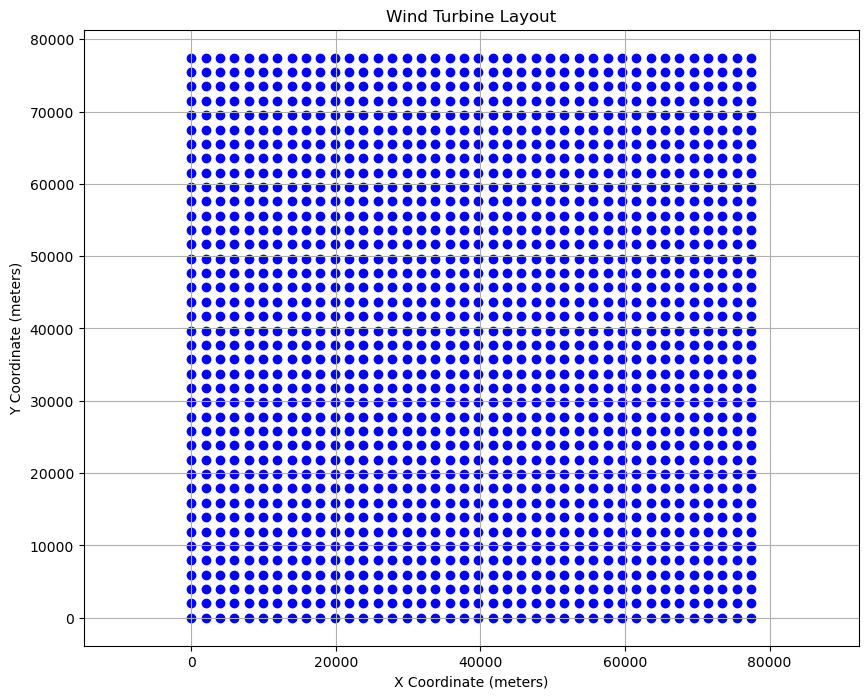

In [2]:
import matplotlib.pyplot as plt

# Plot the turbine layout
plt.figure(figsize=(10, 8))
plt.scatter(np.tile(x_coords, len(y_coords)), np.repeat(y_coords, len(x_coords)), c='blue', marker='o')
plt.title("Wind Turbine Layout")
plt.xlabel("X Coordinate (meters)")
plt.ylabel("Y Coordinate (meters)")
plt.grid(True)
plt.axis("equal")
plt.show()


In [3]:
import numpy as np

# Settings
n_blocks = 3
turbines_per_cell = 1.0
turbine_model = "NREL-15MW-242"

# Grid parameters from namelist
dx = 1936  # meters per grid cell
grid_start_x = 5  # where to place the first rectangle (grid units)
grid_start_y = 5

block_width = 6   # in grid cells
block_height = 11  # in grid cells

# Output file
output_file = "farm_custom.ideal"

lines = ["latlon"]

# Generate 3 adjacent rectangles
for block_id in range(n_blocks):
    x_offset = grid_start_x + block_id * (block_width + 2)  # leave 2-cell gap between blocks
    for i in range(block_height):
        for j in range(block_width):
            y = grid_start_y + i
            x = x_offset + j
            lines.append(f"{turbines_per_cell:.1f} {y:.1f} {x:.1f} {turbine_model} 1")

# Write to file
with open(output_file, "w") as f:
    f.write("\n".join(lines))

print(f"✅ Wrote layout to {output_file}")



✅ Wrote layout to farm_custom.ideal


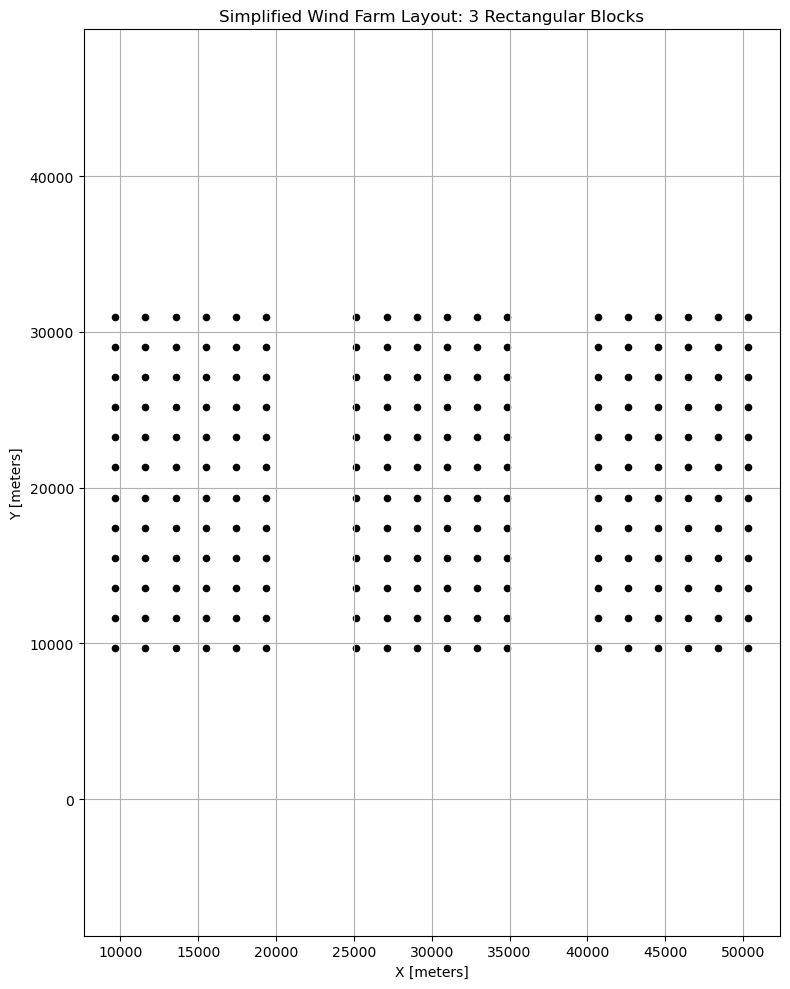

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n_blocks = 3
block_width = 6    # grid cells wide
block_height = 12  # grid cells tall
grid_spacing = 1936  # meters per grid cell

grid_start_x = 5
grid_start_y = 5

# Store turbine positions
x_all = []
y_all = []

# Loop over each rectangle
for block_id in range(n_blocks):
    x_offset = grid_start_x + block_id * (block_width + 2)  # space between blocks

    for i in range(block_height):
        for j in range(block_width):
            x = (x_offset + j) * grid_spacing
            y = (grid_start_y + i) * grid_spacing
            x_all.append(x)
            y_all.append(y)

# ✅ Ensure equal lengths
assert len(x_all) == len(y_all), "x and y arrays are mismatched in length."

# Plot the layout
plt.figure(figsize=(8, 10))
plt.scatter(x_all, y_all, c='black', s=20)
plt.title("Simplified Wind Farm Layout: 3 Rectangular Blocks")
plt.xlabel("X [meters]")
plt.ylabel("Y [meters]")
plt.grid(True)
plt.axis("equal")
plt.tight_layout()
plt.show()
